# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Ximena Aquino Pérez

- ID: A01639678

- My carreer: IRS


# Importing libraries

In [1]:

# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.cluster import KMeans  # For calculate the clusters
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# PART 1
# Use your assigned dataset

## A1 Load data

In [2]:

path = r"D:\Escuela\SextoSemestre\SemanaTec\TC1002S\NotebooksStudents\A01639678\A01639678.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,x1,x2
0,0,-0.351212,-0.024810
1,1,0.349466,-1.037574
2,2,0.760969,-0.589648
3,3,0.084249,0.343628
4,4,-0.209052,0.314843
...,...,...,...
763,763,0.428893,-0.269184
764,764,-0.223920,0.472742
765,765,0.209286,0.514853
766,766,0.006190,-0.513584


## A2 Data managment


Print the first 7 rows

In [3]:
df.head() #For the first 5 rows
print(df[:7])

   Unnamed: 0        x1        x2
0           0 -0.351212 -0.024810
1           1  0.349466 -1.037574
2           2  0.760969 -0.589648
3           3  0.084249  0.343628
4           4 -0.209052  0.314843
5           5  0.071697  0.382442
6           6 -0.281623  0.931037


Print the first 4 last rows

In [4]:
df.tail()
print(df[-4:])

     Unnamed: 0        x1        x2
764         764 -0.223920  0.472742
765         765  0.209286  0.514853
766         766  0.006190 -0.513584
767         767 -0.900022 -0.552293


How many rows and columns are in your data?

Use the `shape` method


In [5]:
# Observations
rows_count = df.shape[0]
print('Number of Rows count is:', rows_count )
# Variables
columns_count = df.shape[1]
print('Number of Columns count is:', columns_count )

Number of Rows count is: 768
Number of Columns count is: 3


Print the name of all columns 

Use the `columns` method

In [6]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2'], dtype='object')

What is the data type in each column

Use the `dtypes` method 

In [7]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
dtype: object

What is the meaning of rows and columns?

°Rows are the number of observations mean while columns are the variables observated from them

Print a statistical summary of your columns


In [8]:
df.describe()

,Unnamed: 0,x1,x2
count,768.000000,768.000000,768.000000
mean,383.500000,-0.000027,-0.000757
std,221.846794,0.563135,0.568028
min,0.000000,-1.110914,-1.239584
25%,191.750000,-0.435446,-0.437919
50%,383.500000,-0.011193,0.013684
75%,575.250000,0.425838,0.418430
max,767.000000,1.117509,1.131306


1) What is the minumum and maximum values of each variable
 - For the first one, which meaning is the index we have the minimun value as 0 and it maximum 767, so we hace 768 observations
 - For x1 we have the minimun value as -1.110914 and the maximum as 1.117509
 - For x2 we have the minimum values as -1.239584 and the maximum as 1.131306

2) What is the mean and standar deviation of each variable
 - For index we have the mean as 383.5 and the std as 221.846794
 - For x1 we have the mean as -0.000027 and the std as 0.563135
 - For x2 we have the mean as -0.000757 and the std as 0.568028

3) What the 25%, 50% and 75% represent?
 - We have the numbers where we are located in this percentages from the data

In [9]:
#Droping the "index" column
df = df.drop(df.columns[[0]], axis='columns')
df.tail()

,x1,x2
763,0.428893,-0.269184
764,-0.223920,0.472742
765,0.209286,0.514853
766,0.006190,-0.513584
767,-0.900022,-0.552293


Rename the columns using the same name with capital letters

In [10]:
df = df.rename(columns={"x1":"X1", "x2":"X2"})
df.tail()

,X1,X2
763,0.428893,-0.269184
764,-0.223920,0.472742
765,0.209286,0.514853
766,0.006190,-0.513584
767,-0.900022,-0.552293


Rename the columns to their original names

In [11]:
df = df.rename(columns={"X1":"x1", "X2":"x2"})
df.tail()

,x1,x2
763,0.428893,-0.269184
764,-0.223920,0.472742
765,0.209286,0.514853
766,0.006190,-0.513584
767,-0.900022,-0.552293


Use two different alternatives to get one of the columns

In [12]:
a = df.x1
b = df["x1"]
print(a)
print(b)

0     -0.351212
1      0.349466
2      0.760969
3      0.084249
4     -0.209052
         ...   
763    0.428893
764   -0.223920
765    0.209286
766    0.006190
767   -0.900022
Name: x1, Length: 768, dtype: float64
0     -0.351212
1      0.349466
2      0.760969
3      0.084249
4     -0.209052
         ...   
763    0.428893
764   -0.223920
765    0.209286
766    0.006190
767   -0.900022
Name: x1, Length: 768, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [13]:
df.loc[62:75,:]

,x1,x2
62,-0.342550,-0.880506
63,-0.279617,0.211923
64,0.030117,-1.158558
65,-0.811753,0.568891
66,-0.148756,0.574613
67,0.253518,0.984264
68,-0.047822,-0.991769
69,-0.487479,-0.690375
70,-0.128977,0.486946
71,0.933578,0.560182


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [14]:
df.isnull().sum()
df.notnull().sum()

x1    768
x2    768
dtype: int64

Discard the last column


 - I already do it because I need clean the dataset before, and I dropped the first one

### Questions 

Based on the previos results, provide a description of yout dataset

Your response:
 - We have a dataset which contains two variables and it index, there are 768 observations and 2 variables which describe them




## A3 Data visualization

Plot in the same figure the histogram of the two variables

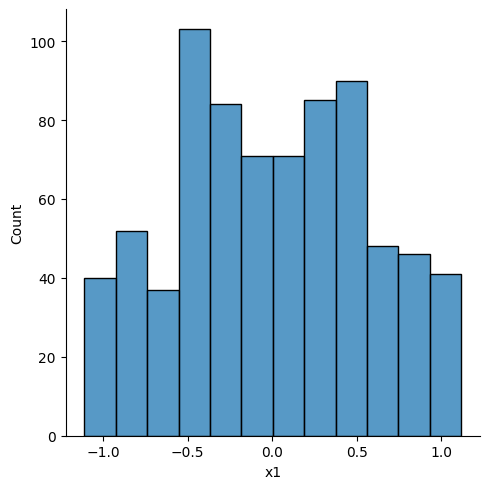

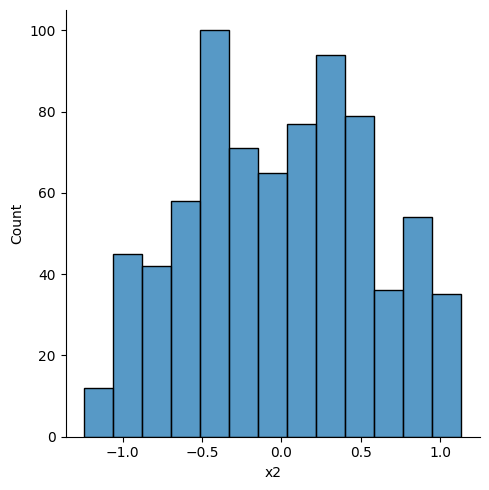

In [15]:
sns.displot(df["x1"], kde = False)
sns.displot(df["x2"], kde = False)

Based on this plots, provide a description of your data:

Your response here:
 - For the first variable we have that -0.5 is the most repeated number and for the second variable (x2) is also -0.5 but 0.5 is also reapeated

Plot in the same figure the boxplot of the two variables 

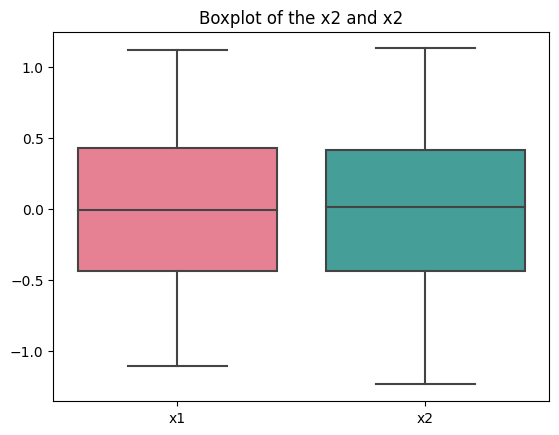

In [16]:
x = df.loc[:,["x1","x2"]]
x2bp = sns.boxplot(data=x,orient="v",palette="husl")
x2bp.set_title("Boxplot of the x2 and x2")
plt.show()

Scatter plot of the two variables

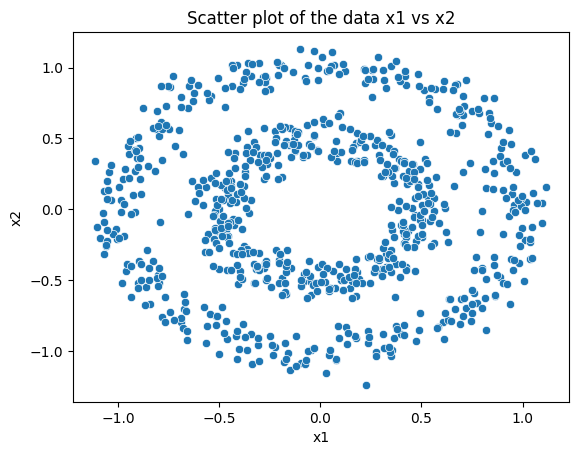

In [17]:
sns.scatterplot(data=df,y="x2", x="x1")
plt.title("Scatter plot of the data x1 vs x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Questions 

Based on the previos plots, provide a description of yout dataset

Your response:
 - We can observe a peculiar form of the scatter, then we have confused conclussions, I think that we have 2 clusters, but in a different ways because one of them have inside the other.
 - From the boxplot we can say that x1 and x2 are very similar.




## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [18]:
# Define number of clusters
K  = 2 # Let's assume there are 2,3,4,5...? clusters/groups
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)

# Print estimated cluster of each point in the dataset
yestimated

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,

Add to your dataset a column with the assigned cluster to each data point

In [19]:
df["yestimated"] = yestimated
df.drop(axis=1, index=6, inplace=True)

df.head()

,x1,x2,yestimated
0,-0.351212,-0.024810,1
1,0.349466,-1.037574,1
2,0.760969,-0.589648,0
3,0.084249,0.343628,0
4,-0.209052,0.314843,1


Print the number associated to each cluster

In [20]:
df.yestimated.unique()

array([1, 0])

Print the centroids

In [21]:
centroids = km.cluster_centers_
centroids

array([[ 0.41126162,  0.24292818],
       [-0.41997465, -0.2495723 ]])

Print the intertia metric

In [22]:
sse = km.inertia_
sse

311.4945326747867

In [23]:
# The number of iterations required to converge
km.n_iter_

4

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

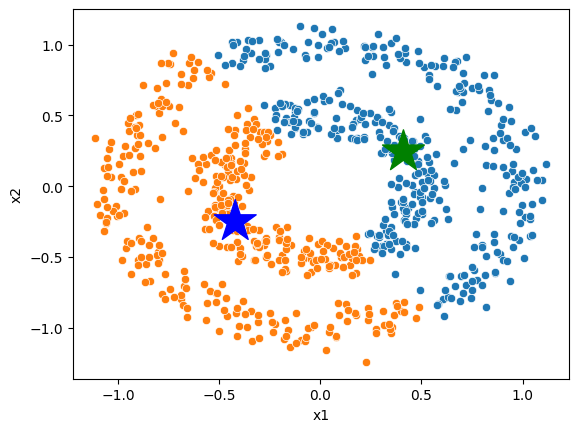

<Figure size 3000x3000 with 0 Axes>

In [24]:
df_cluster0 = df[df['yestimated']==0]
df_cluster1 = df[df['yestimated']==1]

# Scatter plot of each cluster

sns.scatterplot(x="x1", y="x2", data=df_cluster0)
sns.scatterplot(x="x1", y="x2", data=df_cluster1)
colores = ['green','blue']
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c=colores, s=1000)

fig = plt.figure(figsize=(30,30))


### Questions 

Provides a detailed description of your results

Your response:
 - I can observed 2 clusters but not the clusters that I expect, then I look for information about the algorithm and my conclusion is that Kmeans doesn´t have the capability for datasets like this.

## A5 Elbow plot

Compute the Elbow plot

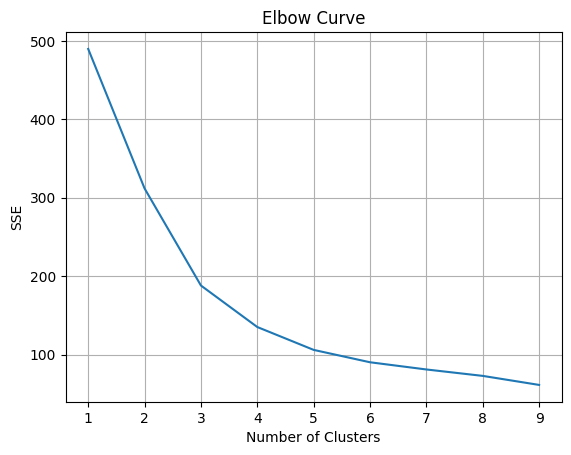

In [25]:
original_df = df.drop(axis=1, columns=['yestimated'])

# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_values = range(1, 10)

# For each k
for k in k_values:
    # Create a kmeans model with k clusters
    km = KMeans(n_clusters=k, n_init='auto')
    # Fit the model to the data
    km.fit(original_df)
    # Append the SSE to the list
    sse.append(km.inertia_)

sse

plt.plot(k_values,sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve')
plt.grid()
plt.show()

### Questions 

What is the best number of clusters K? (argue your response)

Your response:
 - We have two possibles best numbers of clusters because we can observe 2 long falls, the first one at 2 and the second one at 4, then guiding me trought my guess I decide use 2.

Does this number of clusters agree with your inital guess? (argue your response)

Your response:
 - I could say yes but there is another number of clusters which could be better that mine.



# PART 2
# Create a dataset and do clustering

1) Generate some data using the "make_blobs" function from "sklearn.datasets"

- The number of observations is equal to the three last digits in your ID (if this number is lower than 99, then multiply it by ten)

- 3 variables

- 4 clusters

- Standar desviation of each cluster of 1.5



In [26]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=678, n_features=3, centers=4, random_state=45, cluster_std=1.5)
#print(X)
df = pd.DataFrame(data=X, columns=["x1","x2","x3"])
df

,x1,x2,x3
0,8.628124,2.553907,-4.430794
1,-8.138109,0.229934,0.378603
2,9.516097,-0.790126,-3.530885
3,7.450583,0.204016,-4.094966
4,3.413254,6.109720,1.333311
...,...,...,...
673,-7.362748,-4.054646,-7.668233
674,-10.044097,-0.279348,-1.169686
675,-7.271251,-0.088803,0.538946
676,-8.223780,-0.327358,-1.157070


2) Plot the scatter plot of your data using the real cluster labels

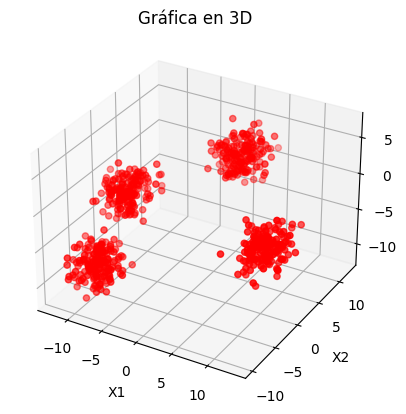

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

x = df["x1"]
y = df["x2"]
z = df["x3"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c="red")

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Gráfica en 3D')

plt.show()


3) Do K means clustering 

In [28]:
# Define number of clusters
K  = 4 # Let's assume there are 2,3,4,5...? clusters/groups
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)

# Print estimated cluster of each point in the dataset
yestimated

df["yestimated"] = yestimated
df.drop(axis=1, index=6, inplace=True)
df.head()
df.yestimated.unique()
sse = km.inertia_
sse

4528.528271997996

In [29]:
centroids = km.cluster_centers_
centroids

array([[ 9.76117201,  1.13923233, -4.58277971],
       [-8.86494208, -6.7289357 , -7.66957253],
       [ 2.48291131,  7.16130822,  2.90357014],
       [-8.54063627, -0.96222739, -0.76632359]])

4) Plot the scatter plot of your data using the estimated cluster labels

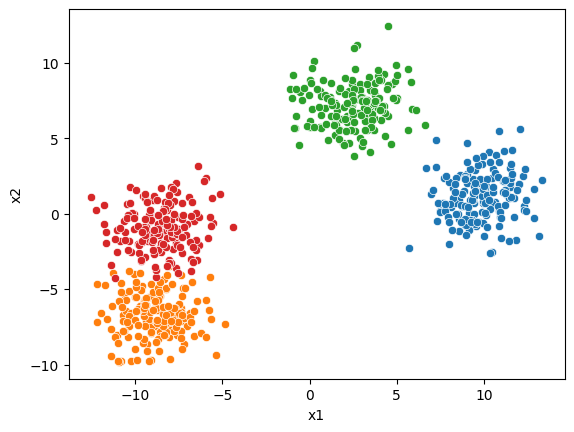

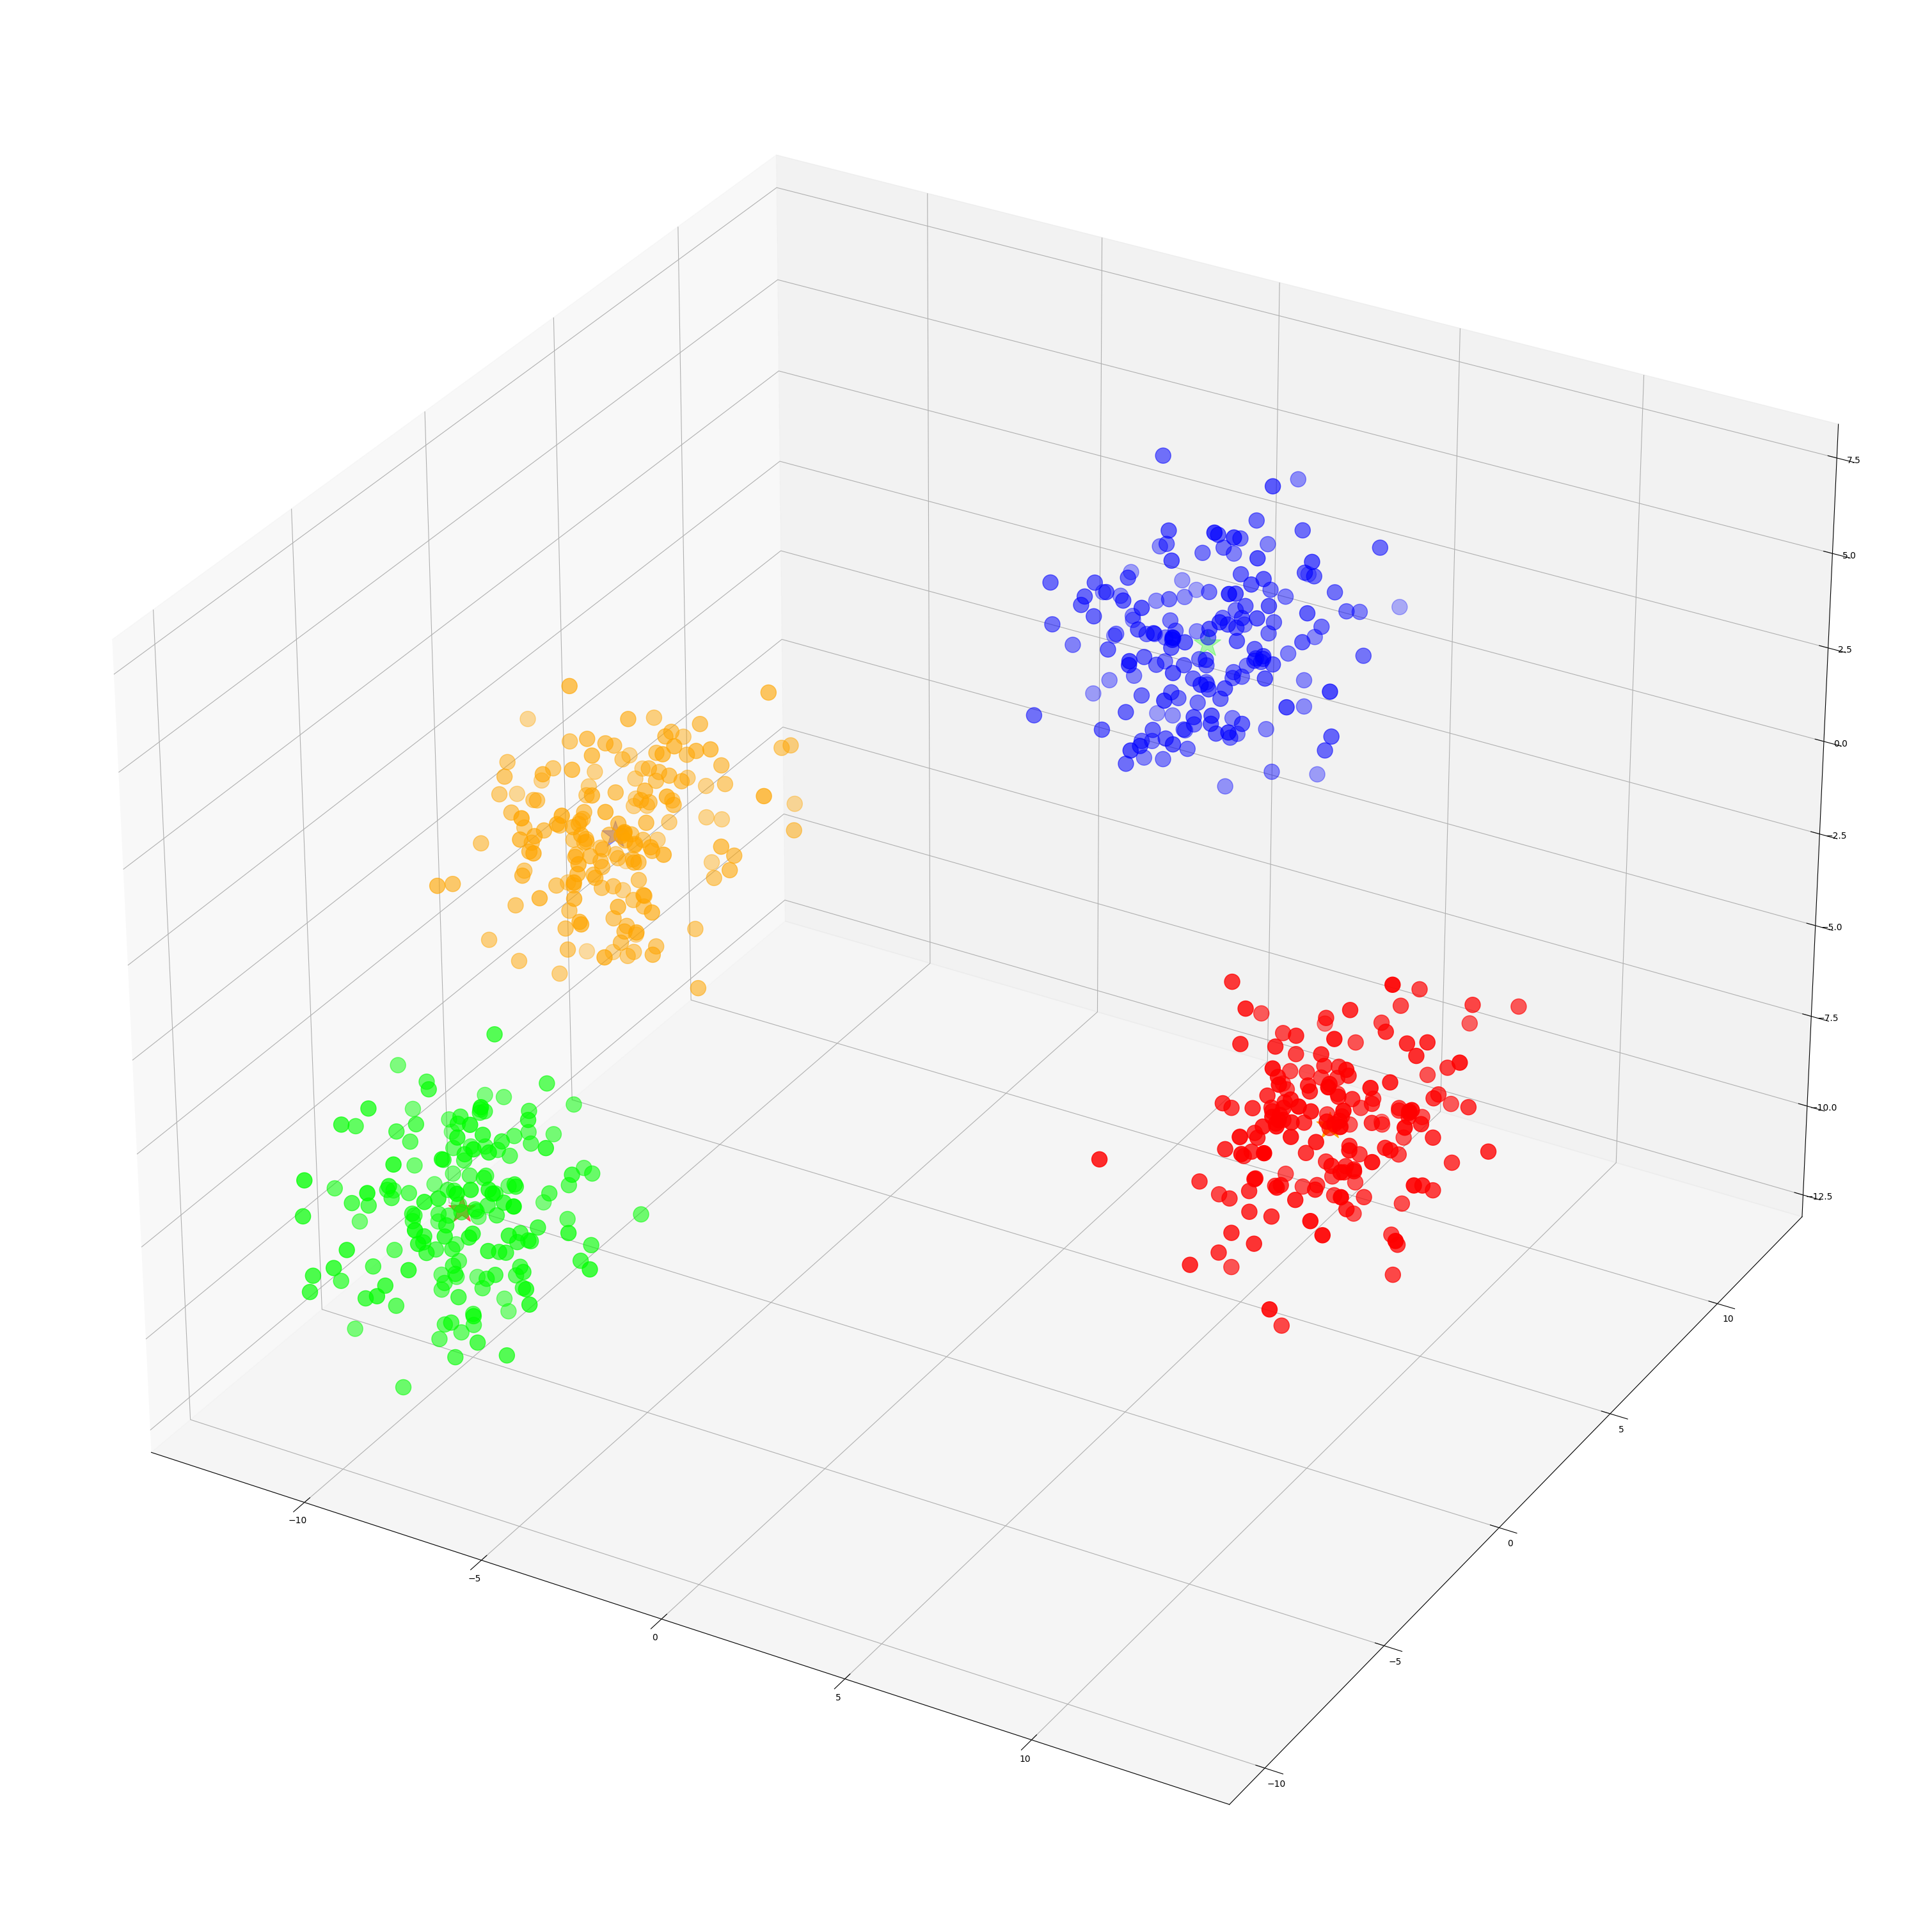

In [30]:
# Get a dataframe with the data of each clsuter

df_cluster0 = df[df['yestimated']==0]
df_cluster1 = df[df['yestimated']==1]
df_cluster2 = df[df['yestimated']==2]
df_cluster3 = df[df['yestimated']==3]

# Scatter plot of each cluster

sns.scatterplot(x="x1", y="x2", data=df_cluster0)
sns.scatterplot(x="x1", y="x2", data=df_cluster1)
sns.scatterplot(x="x1", y="x2", data=df_cluster2)
sns.scatterplot(x="x1", y="x2", data=df_cluster3)

fig = plt.figure(figsize=(30,30))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Red, Green, Blue, Orange
color_map = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFA500'])
colores = [ '#FFA500','#FF0000', '#00FF00', '#0000FF']

sc = ax.scatter(df["x1"], df["x2"], df["x3"], c=df["yestimated"], s=300, cmap=color_map)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c=colores, s=1000)

### Questions 

Provides a detailed description of your results.

Your response:
 - We obtained data in the way that we need, so, our clusters and kmeans are very close to predictiones and definitely are data that easly can be manipulated by the algorithm

# PART 3
# Descripcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu descripción del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:
 - De acuerdo con lo aplicado el día de hoy podría decir que puedo identificar la interacción creada entre diferentes variables de manera que distinga cuales de ellas contribuyen a lo que necesitamos ya que desde la primera vista de nuestros datos es necesrio saber cuales de ellos son necesarios para un análisis correcto y cuales de ellos son irrelevantes para la investigación, un claro ejemplo me parece que fue el análisis de cartwheels porque si bien había datos que eran de suma importancia para la predicción de las respuestas había otros que podían ser redundantes o incluso innecesarios

Escribe tu descripción del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:
 - Después del desarrollo de un modelo y multiples análisis de datsets anteriores considero tener la capacidad de explicar y agrupar comportamientos importantes a través de múltiples observaciones del fenómeno.